<a href="https://colab.research.google.com/github/VISHAL1SELVAM/CognoRiseInfoTech/blob/main/CREDITCARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Fraud Detection

About Dataset

Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.



                   

Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Approach to the prediction   
1.Import all libaray
2.Load and audit the data
3.Data prepration and Data Transformation
4.Dealing with missing value
5.Inconsistent value: Replace all transformation with consistent values
6.Dealing With Outliers
7.Data visualization
8.Data analysis
9.Uni-variate Analysis(Mean,Median,Mode,Skewness)
10.Bi-variate Analysis(Correlation,Covariance,Chi-Square Test)
11.Multi-Variate Analysis
12.Regression:Not a regressiion
13.Classification

Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb

Load the dataset

In [2]:
df=pd.read_csv('/content/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103088 entries, 0 to 103087
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    103088 non-null  int64  
 1   V1      103088 non-null  float64
 2   V2      103088 non-null  float64
 3   V3      103088 non-null  float64
 4   V4      103088 non-null  float64
 5   V5      103088 non-null  float64
 6   V6      103088 non-null  float64
 7   V7      103088 non-null  float64
 8   V8      103088 non-null  float64
 9   V9      103088 non-null  float64
 10  V10     103088 non-null  float64
 11  V11     103088 non-null  float64
 12  V12     103088 non-null  float64
 13  V13     103088 non-null  float64
 14  V14     103088 non-null  float64
 15  V15     103088 non-null  float64
 16  V16     103088 non-null  float64
 17  V17     103088 non-null  float64
 18  V18     103088 non-null  float64
 19  V19     103088 non-null  float64
 20  V20     103088 non-null  float64
 21  V21     10

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,103088.000000,103088.000000,103088.000000,103088.000000,103088.000000,103088.000000,103088.000000,103088.000000,103088.000000,103088.000000,...,103088.000000,103088.000000,103088.000000,103088.000000,103087.000000,103087.000000,103087.000000,103087.000000,103087.000000,103087.000000
mean,43195.783496,-0.259278,-0.032491,0.684622,0.156327,-0.283952,0.099404,-0.116461,0.056888,-0.046868,...,-0.028920,-0.104803,-0.037813,0.009360,0.133760,0.026201,0.001784,0.001943,97.037649,0.002251
std,17339.553909,1.851810,1.650426,1.321775,1.346277,1.355148,1.302138,1.217442,1.237722,1.115283,...,0.746371,0.640178,0.628632,0.595227,0.440465,0.492544,0.391814,0.322462,263.287232,0.047387
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33760.000000,-1.026222,-0.600738,0.179380,-0.715776,-0.908043,-0.643339,-0.606811,-0.135589,-0.694322,...,-0.223478,-0.529604,-0.177659,-0.323367,-0.130323,-0.323492,-0.061778,-0.005197,7.170000,0.000000
50%,45003.000000,-0.262181,0.075028,0.759434,0.184192,-0.318363,-0.151559,-0.072630,0.076816,-0.115372,...,-0.056063,-0.080240,-0.050194,0.065235,0.172269,-0.069541,0.010610,0.023358,25.690000,0.000000
75%,56992.500000,1.154372,0.733932,1.386306,1.027020,0.245974,0.494781,0.410230,0.367677,0.556107,...,0.121638,0.316316,0.080639,0.406512,0.421853,0.296274,0.084605,0.076830,88.000000,0.000000
max,68489.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [6]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.008622,-0.053916,-0.024896,-0.029865,-0.045456,-0.002008,-0.005271,0.017361,-0.245627,...,0.007257,0.021225,0.001098,-0.000023,0.010244,-0.000979,-0.010993,-0.005604,0.032470,-0.014508
V1,-0.008622,1.000000,0.054895,0.218518,-0.064871,0.015327,0.065455,0.082897,-0.002634,-0.053960,...,-0.028674,-0.051158,-0.080361,-0.011594,0.193492,0.020434,-0.026698,0.139585,-0.251688,-0.150782
V2,-0.053916,0.054895,1.000000,-0.086224,0.047884,-0.046386,0.019296,-0.026783,0.008122,-0.009411,...,-0.009402,-0.030778,0.008088,-0.023654,-0.092543,-0.025672,0.005657,0.012917,-0.553145,0.124101
V3,-0.024896,0.218518,-0.086224,1.000000,-0.091189,0.201601,-0.065974,0.195663,-0.123550,0.121341,...,0.022161,0.247138,0.044062,0.025468,-0.185361,0.040823,-0.074744,0.029237,-0.232438,-0.306678
V4,-0.029865,-0.064871,0.047884,-0.091189,1.000000,-0.003044,-0.043899,-0.022433,0.041523,0.040621,...,0.020429,0.029108,-0.007567,-0.000247,-0.003521,-0.022891,0.042800,-0.003706,0.095143,0.163818
V5,-0.045456,0.015327,-0.046386,0.201601,-0.003044,1.000000,0.032950,-0.044443,-0.019538,0.040056,...,-0.055530,-0.084535,0.017970,-0.016290,-0.009832,-0.043290,-0.029435,0.000964,-0.402767,-0.142490
V6,-0.002008,0.065455,0.019296,-0.065974,-0.043899,0.032950,1.000000,0.062680,-0.048839,0.042896,...,0.021710,0.043148,-0.018404,-0.001614,0.048758,0.002420,-0.008295,-0.013069,0.210676,-0.060743
V7,-0.005271,0.082897,-0.026783,0.195663,-0.022433,-0.044443,0.062680,1.000000,-0.002982,0.044290,...,-0.014567,-0.037472,0.069401,0.000991,-0.096220,-0.032945,-0.098680,-0.046790,0.386188,-0.249257
V8,0.017361,-0.002634,0.008122,-0.123550,0.041523,-0.019538,-0.048839,-0.002982,1.000000,-0.029389,...,-0.008416,0.045659,-0.024112,0.003719,0.015456,0.006485,0.006628,0.023345,-0.095994,0.060761
V9,-0.245627,-0.053960,-0.009411,0.121341,0.040621,0.040056,0.042896,0.044290,-0.029389,1.000000,...,0.000082,0.039641,-0.049083,0.011600,0.118345,0.108298,-0.032631,-0.025078,-0.020389,-0.116766


In [28]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [31]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.008633,-0.053915,-0.024903,-0.029871,-0.045450,-0.002011,-0.005264,0.017358,-0.245638,...,0.007256,0.021218,0.001095,-0.000023,0.010244,-0.000979,-0.010993,-0.005604,0.032470,-0.014508
V1,-0.008633,1.000000,0.054896,0.218515,-0.064874,0.015331,0.065454,0.082902,-0.002636,-0.053964,...,-0.028674,-0.051162,-0.080362,-0.011594,0.193492,0.020434,-0.026698,0.139585,-0.251688,-0.150782
V2,-0.053915,0.054896,1.000000,-0.086223,0.047885,-0.046387,0.019296,-0.026784,0.008123,-0.009410,...,-0.009402,-0.030778,0.008089,-0.023654,-0.092543,-0.025672,0.005657,0.012917,-0.553145,0.124101
V3,-0.024903,0.218515,-0.086223,1.000000,-0.091191,0.201603,-0.065975,0.195666,-0.123551,0.121338,...,0.022161,0.247136,0.044061,0.025468,-0.185361,0.040823,-0.074744,0.029237,-0.232438,-0.306678
V4,-0.029871,-0.064874,0.047885,-0.091191,1.000000,-0.003042,-0.043900,-0.022431,0.041522,0.040619,...,0.020428,0.029106,-0.007568,-0.000247,-0.003521,-0.022891,0.042800,-0.003706,0.095143,0.163818
V5,-0.045450,0.015331,-0.046387,0.201603,-0.003042,1.000000,0.032951,-0.044445,-0.019537,0.040059,...,-0.055530,-0.084533,0.017970,-0.016290,-0.009832,-0.043290,-0.029435,0.000964,-0.402767,-0.142490
V6,-0.002011,0.065454,0.019296,-0.065975,-0.043900,0.032951,1.000000,0.062681,-0.048840,0.042895,...,0.021710,0.043147,-0.018404,-0.001614,0.048758,0.002420,-0.008295,-0.013069,0.210676,-0.060743
V7,-0.005264,0.082902,-0.026784,0.195666,-0.022431,-0.044445,0.062681,1.000000,-0.002981,0.044293,...,-0.014566,-0.037469,0.069402,0.000991,-0.096220,-0.032945,-0.098680,-0.046790,0.386188,-0.249257
V8,0.017358,-0.002636,0.008123,-0.123551,0.041522,-0.019537,-0.048840,-0.002981,1.000000,-0.029391,...,-0.008416,0.045658,-0.024112,0.003719,0.015456,0.006485,0.006628,0.023345,-0.095994,0.060761
V9,-0.245638,-0.053964,-0.009410,0.121338,0.040619,0.040059,0.042895,0.044293,-0.029391,1.000000,...,0.000082,0.039639,-0.049084,0.011600,0.118345,0.108298,-0.032631,-0.025078,-0.020389,-0.116766


In [32]:
df['Class'].value_counts()

0.0    102855
1.0       232
Name: Class, dtype: int64

Data visualization

<ipython-input-33-7188315ab755>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])


<Axes: xlabel='Time', ylabel='Density'>

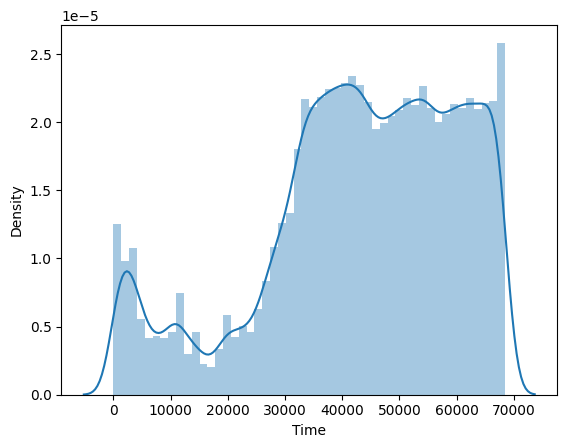

In [33]:
sns.distplot(df['Time'])

<ipython-input-34-40e6003ccc36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

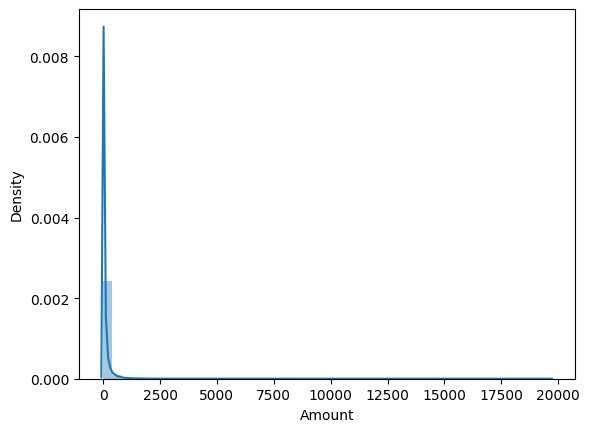

In [34]:
sns.distplot(df['Amount'])

(0.0, 1.05)

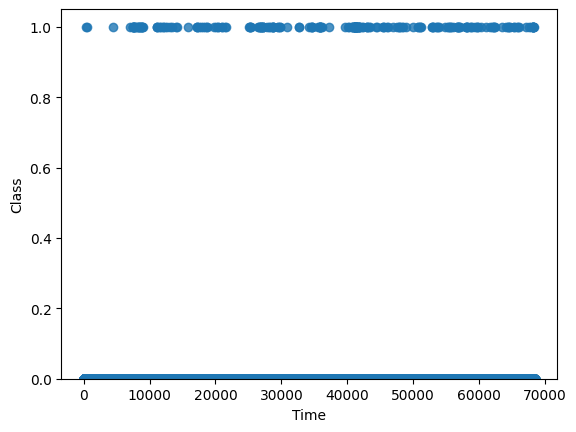

In [35]:
sns.regplot(x='Time',y='Class',data=df)
plt.ylim(0,)

Splitting the dataset

In [36]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [37]:
x.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

Train test split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

Scaling the dataset using standard scaler

In [39]:
scalar=StandardScaler()
x_train_scal=scalar.fit_transform(x_train)
x_test_scal=scalar.fit_transform(x_test)

In [40]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score.round(2))
   print(cn_matrix)
   print(cla_report)

Random forest classifier

In [41]:
rf= RandomForestClassifier(n_estimators=200 ,max_depth=5 ,verbose=1)
rf.fit(x_train_scal,y_train)
preds_rf_train=rf.predict(x_train_scal)
preds_rf_test=rf.predict(x_test_scal)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   14.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s


In [42]:
acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

accuracy:: 1.0
[[82289     1]
 [   25   154]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82290
         1.0       0.99      0.86      0.92       179

    accuracy                           1.00     82469
   macro avg       1.00      0.93      0.96     82469
weighted avg       1.00      1.00      1.00     82469

accuracy:: 1.0
[[20561     4]
 [   12    41]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20565
         1.0       0.91      0.77      0.84        53

    accuracy                           1.00     20618
   macro avg       0.96      0.89      0.92     20618
weighted avg       1.00      1.00      1.00     20618



Logistic regression

In [43]:
lr=LogisticRegression()
lr.fit(x_train_scal,y_train)
preds_ytrain_lr=lr.predict(x_train_scal)
preds_ytest_lr=lr.predict(x_test_scal)

In [44]:
acc_report(y_test,preds_ytest_lr)
acc_report(y_train,preds_ytrain_lr)

accuracy:: 1.0
[[20554    11]
 [   29    24]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20565
         1.0       0.69      0.45      0.55        53

    accuracy                           1.00     20618
   macro avg       0.84      0.73      0.77     20618
weighted avg       1.00      1.00      1.00     20618

accuracy:: 1.0
[[82268    22]
 [   69   110]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82290
         1.0       0.83      0.61      0.71       179

    accuracy                           1.00     82469
   macro avg       0.92      0.81      0.85     82469
weighted avg       1.00      1.00      1.00     82469



Decision tree classifier

In [45]:
dtc=DecisionTreeClassifier(max_depth=5,min_samples_split=2)
dtc.fit(x_train_scal,y_train)
preds_ytrain_dtc=dtc.predict(x_train_scal)
preds_ytest_dtc=dtc.predict(x_test_scal)

In [46]:
acc_report(y_train,preds_ytrain_dtc)
acc_report(y_test,preds_ytest_dtc)

accuracy:: 1.0
[[82289     1]
 [   25   154]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82290
         1.0       0.99      0.86      0.92       179

    accuracy                           1.00     82469
   macro avg       1.00      0.93      0.96     82469
weighted avg       1.00      1.00      1.00     82469

accuracy:: 1.0
[[20561     4]
 [   15    38]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20565
         1.0       0.90      0.72      0.80        53

    accuracy                           1.00     20618
   macro avg       0.95      0.86      0.90     20618
weighted avg       1.00      1.00      1.00     20618



Gradient boosting classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train_scal,y_train)
preds_gb_train=gb.predict(x_train_scal)
preds_gb_test=gb.predict(x_test_scal)
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 1.0
[[82287     3]
 [   23   156]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82290
         1.0       0.98      0.87      0.92       179

    accuracy                           1.00     82469
   macro avg       0.99      0.94      0.96     82469
weighted avg       1.00      1.00      1.00     82469

accuracy:: 1.0
[[20558     7]
 [   13    40]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20565
         1.0       0.85      0.75      0.80        53

    accuracy                           1.00     20618
   macro avg       0.93      0.88      0.90     20618
weighted avg       1.00      1.00      1.00     20618



Upsampling using smote

In [48]:
from imblearn.over_sampling import SMOTE
smp=SMOTE()

In [49]:
x_smote,y_smote=smp.fit_resample(x ,y)


In [50]:
x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=2)

Logistic Regression

In [51]:
lr.fit(x_sm_train,y_sm_train)
preds_ytrain_lr=lr.predict(x_sm_train)
preds_ytest_lr=lr.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_lr)
acc_report(y_sm_test,preds_ytest_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:: 0.97
[[80621  1733]
 [ 3682 78532]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     82354
         1.0       0.98      0.96      0.97     82214

    accuracy                           0.97    164568
   macro avg       0.97      0.97      0.97    164568
weighted avg       0.97      0.97      0.97    164568

accuracy:: 0.97
[[20059   442]
 [  862 19779]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     20501
         1.0       0.98      0.96      0.97     20641

    accuracy                           0.97     41142
   macro avg       0.97      0.97      0.97     41142
weighted avg       0.97      0.97      0.97     41142



Decision tree classifier

In [52]:
dtc.fit(x_sm_train,y_sm_train)
preds_ytrain_dtc=dtc.predict(x_sm_train)
preds_ytest_dtc=dtc.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_dtc)
acc_report(y_sm_test,preds_ytest_dtc)

accuracy:: 0.98
[[80968  1386]
 [ 1470 80744]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     82354
         1.0       0.98      0.98      0.98     82214

    accuracy                           0.98    164568
   macro avg       0.98      0.98      0.98    164568
weighted avg       0.98      0.98      0.98    164568

accuracy:: 0.98
[[20166   335]
 [  360 20281]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     20501
         1.0       0.98      0.98      0.98     20641

    accuracy                           0.98     41142
   macro avg       0.98      0.98      0.98     41142
weighted avg       0.98      0.98      0.98     41142



random forest classifier

In [53]:
rf.fit(x_sm_train,y_sm_train)
preds_ytrain_rf=rf.predict(x_sm_train)
preds_ytest_rf=rf.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_rf)
acc_report(y_sm_test,preds_ytest_rf)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   39.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  2.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.4s


accuracy:: 0.97
[[82205   149]
 [ 4082 78132]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     82354
         1.0       1.00      0.95      0.97     82214

    accuracy                           0.97    164568
   macro avg       0.98      0.97      0.97    164568
weighted avg       0.98      0.97      0.97    164568

accuracy:: 0.98
[[20468    33]
 [  971 19670]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98     20501
         1.0       1.00      0.95      0.98     20641

    accuracy                           0.98     41142
   macro avg       0.98      0.98      0.98     41142
weighted avg       0.98      0.98      0.98     41142



Gradient boosting classifier

In [54]:
gb.fit(x_sm_train,y_sm_train)
preds_ytrain_gb=gb.predict(x_sm_train)
preds_ytest_gb=gb.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_gb)
acc_report(y_sm_test,preds_ytest_gb)

accuracy:: 1.0
[[82120   234]
 [  486 81728]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     82354
         1.0       1.00      0.99      1.00     82214

    accuracy                           1.00    164568
   macro avg       1.00      1.00      1.00    164568
weighted avg       1.00      1.00      1.00    164568

accuracy:: 1.0
[[20451    50]
 [  119 20522]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     20501
         1.0       1.00      0.99      1.00     20641

    accuracy                           1.00     41142
   macro avg       1.00      1.00      1.00     41142
weighted avg       1.00      1.00      1.00     41142



Conclusion

Fitting the data in the models we can see that the models overfit .Because, the classes are not balanced

so, we upsample the data using SMOTE then we can see the model gradientboost classifier performs well on this dataset gives the high accuracy